<a href="https://colab.research.google.com/github/protikmostafa083/Machine-Learning-Workbook/blob/main/MostafaMohiuddinJalal_Task1PartB_29032023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
<p align = "justify">
This report presents the results of a text analysis performed on a provided datasets, using the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology. The aim of this project is to explore, analyze, manipulate, visualize, and interpret the data to derive insights. The report showcases the application of various text analysis techniques, including data cleaning, and visualization. Through this process, the report offers insights into the nature and characteristics of the datasets, with a particular focus on exploring patterns in the data, identifying common themes, and drawing meaningful conclusions.<br></p>

<p align = "justify">
An overview of the data sets used in this analysis and the methodology applied will be provided in the first section. Subsequently, the data will be explored through basic descriptive details, cleaning, and preprocessing. The data will then be analyzed and interpreted by applying various text analysis techniques, including sentiment analysis, topic modeling, and concordance analysis. The findings will be presented using engaging visualizations and narratives. The report will conclude with a summary of the results, their implications, and their relevance to the field of text analysis.
</p>

# **Business Understanding**
<p align = "justify">
The COVID-19 pandemic has posed unprecedented challenges to societies worldwide. The development and deployment of COVID-19 vaccines have been critical in the fight against the pandemic. However, vaccine hesitancy has been a major challenge in many parts of the world, undermining the effectiveness of vaccination campaigns. In this context, understanding the factors that affect vaccine intent and trust is crucial. The COVID-19 Vaccine Intent Expressions and Trust Annotations datasets aim to provide insights into the public's concerns and attitudes towards COVID-19 vaccines. Through analysis of these datasets, a deeper understanding can be obtained regarding the factors that influence vaccine intent and trust. This information can be used to inform public health policies and communication strategies aimed at improving vaccine acceptance and uptake. By identifying the key drivers of vaccine intent and trust, public health officials can tailor the messaging and interventions to better address the concerns and beliefs of various populations. Furthermore, insights gained from this analysis can be used to identify potential areas for further research and intervention development.
</p>

# **Data Understanding**
<p align = "justify">
This section provides an understanding of the datasets used in this analysis, which are the COVID-19 Vaccine Intent Expressions and the COVID-19 Vaccine Trust Annotations datasets. Both datasets are publicly available and were curated by a team at Johns Hopkins University.</p>

<p align = "justify">
The COVID-19 Vaccine Intent Expressions dataset contains 7,990 varying expressions for common questions about COVID-19 vaccines, and the COVID-19 Vaccine Trust Annotations dataset contains 3,022 VIRADialogs user side inputs annotated for trust. The datasets are split into three files each: train.csv, dev.csv, and test.csv.</p>

<p align = "justify">
In this analysis, we have merged all the splits from both datasets and worked on the combined dataset. The merged dataset has been analyzed using various text analysis techniques, including sentiment analysis, topic modeling, and concordance analysis.</p>

<p align = "justify">
Each file in the COVID-19 Vaccine Intent Expressions dataset contains three columns: sentence, label, and label_idx. The sentence column contains the expression written by an annotator or taken from VIRADialogs, the label column contains the question for which the expression was written, and the label_idx column contains the running class index associated with this label. First columns in this dataset are of object type, the last one is integer.
</p>

<p align = "justify">
Each file in the COVID-19 Vaccine Trust Annotations dataset contains two columns: text and label. The text column contains user-side input taken from VIRA Dialogs, and the label column contains the trust label, which can have one of four values: 0 for low institutional trust, 1 for low agent trust, 2 for neutral, and 3 for high trust. The first column in this dataset is of object type, the second one is of integer type.</p><br> <br>

<p align = "justify">
In the following analysis, often df1_intent_expression is referred to as dataset 1 or df1, and df2_trust is referred to as dataset 2 or df2.
</p><br> <br>

## install required libraries and set locale encoding

In [ ]:
# import the locale module to get the preferred encoding for the system - reference - https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
import locale

# print the preferred encoding of the system
print(locale.getpreferredencoding())

# define a new function called getpreferredencoding that always returns "UTF-8" - reference - https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"

# overwrite the locale.getpreferredencoding function with the new getpreferredencoding function so that it always returns "UTF-8"
locale.getpreferredencoding = getpreferredencoding

# install the spacy package
!pip install spacy

# download the en_core_web_sm model for spacy
!python -m spacy download en_core_web_sm


UTF-8
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-29 07:55:16.909314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 07:55:18.374697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 07:55:18.374788: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

In [ ]:
# install the pyLDAvis package
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.4 MB/s eta 0:00:00


## Install required libraries

In [ ]:
import pandas as pd                                                             # Import pandas library for data manipulation and analysis
import plotly.express as px                                                     # Import Plotly Express library for interactive visualization
import os                                                                       # Import os library to interact with the operating system
import nltk                                                                     # Import Natural Language Toolkit for text processing
nltk.download('stopwords')                                                      # Download stop words data from NLTK library
from nltk.corpus import stopwords                                               # Import stopwords from NLTK corpus
import string                                                                   # Import string module for string manipulation
import re                                                                       # Import re module for regular expressions
import spacy                                                                    # Import spacy library for advanced text processing
from nltk.stem import WordNetLemmatizer                                         # Import WordNetLemmatizer from NLTK for lemmatization
from collections import Counter                                                 # Import Counter from collections for counting items
import matplotlib.pyplot as plt                                                 # Import matplotlib library for plotting
from wordcloud import WordCloud                                                 # Import WordCloud for creating word clouds
import gensim                                                                   # Import gensim for topic modeling
from gensim.models.phrases import Phrases, Phraser                              # Import Phrases and Phraser from gensim for detecting phrases
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder      # Import BigramAssocMeasures and BigramCollocationFinder from nltk for detecting bigrams
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder    # Import TrigramAssocMeasures and TrigramCollocationFinder from nltk for detecting trigrams
import pyLDAvis.sklearn                                                         # Import pyLDAvis for visualization of topic models
from sklearn.decomposition import LatentDirichletAllocation                     # Import LatentDirichletAllocation from scikit-learn for topic modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer    # Import CountVectorizer and TfidfVectorizer from scikit-learn for text vectorization
import gensim                                                                   # Import gensim for topic modeling
from gensim import corpora                                                      # Import corpora from gensim for building a document-term matrix
from nltk.tokenize import word_tokenize                                         # Import word_tokenize from nltk for tokenization
import pyLDAvis.gensim_models as gensimvis                                      # Import pyLDAvis for visualization of topic models
import pyLDAvis                                                                 # Import pyLDAvis for visualization of topic models
pyLDAvis.enable_notebook()                                                      # Enable notebook for pyLDAvis visualization
from textblob import TextBlob                                                   # Import TextBlob from textblob for sentiment analysis
import plotly.graph_objs as go                                                  
from plotly.subplots import make_subplots                                       # Import make_subplots from plotly.subplots for creating subplots
from IPython                                                                    # show HTML

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


## mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## accessing data folders

### defining path variables

In [ ]:
#@title Default title text
path_1 = "/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/Intent_express/" #@param {type:"string"}
path_2 = "/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data/" #@param {type:"string"}

In [ ]:
#@title Default title text
#path2 = "/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data/" #@param {type:"string"}


## accessing first folder

In [ ]:
%cd $path_2

/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data


### present working directory

In [ ]:
!pwd

/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/Intent_express


### list of items in the folder

In [ ]:
!ls

dev_23.csv  test_23.csv  train_23.csv


### read all three files from first folder and merge them together as a single dataframe

In [ ]:
df1_intent_expression = []                                                      # initialize an empty list to save the dataframes

# loop through the files in current working directory and merge them together
for file_name in os.listdir(os.getcwd()):
    file_path = os.path.join(os.getcwd(), file_name)                            # get the full file path by joining the current working directory with the file name
    df = pd.read_csv(file_path)                                                 # read the csv file
    df1_intent_expression.append(df)                                            # append the dataframe to the list of dataframes

# merge all the dataframes together into a single dataframe
df1_intent_expression = pd.concat(df1_intent_expression, ignore_index = True)

In [ ]:
# creating a copy of  first dataset
df1 = df1_intent_expression.copy()

### glimpse of data - first folder

In [ ]:
df1_intent_expression.sample(3)                                                 # sample of data value from df1_intent_expression

,sentence,label,label_idx
4564,Is this the same technique for older vaccines,How is the COVID-19 vaccine different than oth...,141
2847,the measures we have been taking are enough to...,Are regular safety measures enough to stay hea...,20
1994,Why should I believe in the companies that mak...,I don't trust the companies producing the vacc...,13


### shape of df1

In [ ]:
print("Total Number of Rows: ", df1_intent_expression.shape[0])                 # print the number of rows
print("Total Number of Columns: ", df1_intent_expression.shape[1])              # print the number of coumns

Total Number of Rows:  7972
Total Number of Columns:  3


### datatypes

In [ ]:
df1_intent_expression.dtypes                                                    # print the datatypes in the dataset - each column

sentence     object
label        object
label_idx     int64
dtype: object

## accessing second folder

In [ ]:
#%cd $path_2                                                                     # set current directory to the folder having second datasets (train, test, dev)
"""
this previous snippet was working perfectly. Now It is not working so, I had to manually put the path below.
"""
%cd '/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data/'

/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data


### current working directory and list of files in the folder

In [ ]:
!pwd
!ls

/content/gdrive/MyDrive/UniThings/Semester 3/ANLP/AT1B/trust_data
dev.csv   lda_label_lemma.html	   lda_text_lemma.html	train.csv
lda.html  lda_sentence_lemma.html  test.csv


### read all three files from second folder and merge them together as a single dataframe

In [ ]:
df2_trust = []                                                                  # initialize an empty list to save the dataframes

# loop through the files in current working directory and merge them together
for file_name in os.listdir(os.getcwd()):
    if file_name.endswith('.csv'):
        file_path = os.path.join(os.getcwd(), file_name)                        # get the full file path by joining the current working directory with the file name
        df = pd.read_csv(file_path)                                             # read the csv file
        df2_trust.append(df)                                                    # append the dataframe to the list of dataframes

# merge all the dataframes together
df2_trust = pd.concat(df2_trust, ignore_index = True)

### glimpse of data- second folder

In [ ]:
# create a copy of second dataset
df2 = df2_trust.copy()

In [ ]:
df2_trust.sample(3)                                                             # sample of data value from df1_intent_expression

,text,label
1127,I'm allready fully vaccinated. Even though a b...,3
811,Covid19 is a desease to minimaze the population,2
295,where can i get vaccinated,3


### datatypes

In [ ]:
df2_trust.dtypes                                                                # print the datatypes in the dataset - each column

text     object
label     int64
dtype: object

### shape of df2

In [ ]:
print("Total Number of Rows: ", df2_trust.shape[0])                             # print the number of rows
print("Total Number of Columns: ", df2_trust.shape[1])                          # print the number of coumns

Total Number of Rows:  3022
Total Number of Columns:  2


### name of columns in both the datasets

In [ ]:
print("df 2 trust data columns:")
list(df1_intent_expression.columns)

df 2 trust data columns:


['sentence', 'label', 'label_idx']

In [ ]:
print("df 2 trust data columns:")
list(df2_trust.columns)

df 2 trust data columns:


['sentence', 'label', 'label_idx']

# **Data Preparation**
In order to prepare the datasets for analysis, a series of preprocessing steps were applied. 

*   **Converting all the letters into lower case**
<p align = "justify">To ensure consistency in the text data and avoid errors during analysis, we converted all text in the datasets to lowercase. This step is necessary as some words may have different capitalization depending on the author or annotator.</p>

*   **Checking for and removing duplicate values**
<p align = "justify">Duplicate values can skew data analysis results and lead to incorrect conclusions. We checked both datasets for duplicate records and removed them to ensure the accuracy and reliability of our analysis.</p>


*   **Handling Missing Values**
<p align = "justify">Missing values can cause issues during analysis and lead to incorrect conclusions. Fortunately, both datasets had no missing values, which allowed to proceed with further preprocessing steps without having to handle any null or NaN values.</p>


*   **Denoising the data**
<p align = "justify">In order to improve the accuracy of our analysis, noise is removed from the text data by removing stop words, punctuation, and other unwanted characters. Additionally, we removed certain metadata from the text data to ensure the resulting dataset contained only relevant information.</p>

*   **Tokenizing the datasets**
<p align = "justify">Tokenization involves breaking text down into individual tokens or words, making it easier to analyze the text data. Appropriate columns in both the datasets were tokenized and saved the resulting tokens in separate columns to prepare for further analysis.</p>

*   **Lemmatizing the text columns**
<p align = "justify">Lemmatization is the process of reducing words to their base form, or lemma. This step was important to reduce the dimensionality of the text data and ensure that different forms of the same word were treated as a single token during analysis. Text columns of both the datasets were lemmatized and saved for further use.</p>

## converting all the letters into lower case

In [ ]:
# from dataset 1
df1_intent_expression.loc[:,'sentence'] = df1_intent_expression.loc[:,'sentence'].str.lower()
df1_intent_expression.loc[:,'label'] = df1_intent_expression.loc[:,'label'].str.lower()

# from dataset 2
df2_trust.loc[:,'text'] = df2_trust.loc[:,'text'].str.lower()

## Dataset 1: checking the duplicate values in both the datasets and removing redundant values if found any

In [ ]:
# for dataset 1
duplicate1 = pd.DataFrame()                                                     # Create an empty dataframe to store duplicate values
duplicate1 = df1_intent_expression[df1_intent_expression.duplicated('sentence')]
duplicate1

,sentence,label,label_idx
887,how many doses i need,how many doses do i need?,56
1268,can children be vaccinated?,can children get the vaccine?,90
2577,what is ivermectin?,what is ivermectin?,161
3050,can the vaccine make me sick?,can i get covid-19 from the vaccine?,88
3076,how many times can i get covid-19?,can i get covid-19 twice?,126
3087,is the vaccine effective?,can i get covid-19 twice?,126
3727,where can i get vaccinated?,do i qualify for the vaccine?,32
4241,is the vaccine really effective?,does the vaccine prevent transmission?,111
4325,where can i go to get the vaccine?,how can i get the vaccine?,95
4335,what are the requirements to get the vaccine?,how can i get the vaccine?,95


In [ ]:
# Number of duolicate values in the first dataset
print("Number of Duplicate Records in Sentence subset in dataset 1: ", duplicate1.shape[0])

Number of Duplicate Records in Sentence subset in dataset 1:  58


In [ ]:
# Remove the duplicate value
df1_intent_expression = df1_intent_expression.drop_duplicates(subset=['sentence'])

# after the removal, checking the duplicate values again
df1_intent_expression[df1_intent_expression.duplicated('sentence')]             # after removal, no duplicate values.

,sentence,label,label_idx


## Dataset 2: checking the duplicate values in both the datasets and removing redundant values if found any

In [ ]:
# for dataset 2
duplicate2 = pd.DataFrame()                                                     # Create an empty dataframe to store duplicate values
duplicate2 = df2_trust[df2_trust.duplicated('text')]
duplicate2                                                                      

,text,label
480,have people died from the vaccine,0
519,will the vaccine alter my dna,0
560,can i still get covid,2
735,how long is imunity,2
760,what about j&j,2
900,is covid dangerous?,2
1033,what about j&j,2
1268,will the vaccine make me magnetic,0
1325,does the vaccine cause heart inflammation,0
1375,how do we know the vaccine is safe,0


In [ ]:
# Number of duplicate values in the second dataset
print("Number of Duplicate Records in Text subset in dataset 1: ", duplicate2.shape[0])

Number of Duplicate Records in Text subset in dataset 1:  29


In [ ]:
# Remove the duplicate value
df2_trust = df2_trust.drop_duplicates(subset=['text'])

# after the removal, checking the duplicate values again
df2_trust[df2_trust.duplicated('text')]             # after removal, no duplicate values.

,text,label


## Dataset 1: Handling Missing Values

In [ ]:
# Number of missing values in each column for first dataset
df1_intent_expression.isnull().sum()                                            # No missing value in the first dataset

sentence     0
label        0
label_idx    0
dtype: int64

In [ ]:
# Number of missing values in each column for second dataset
df2_trust.isnull().sum()                                                        # No missing value in second dataset

text     0
label    0
dtype: int64

In [ ]:
df2_trust.head(10)

,text,label
0,are the vaccines causing heart conditions in t...,0
1,what are long term effects,0
2,does the moderna shot cause protein in your urine,0
3,does vqccine melt my organs,0
4,will the vaccine kill everyone who takes the v...,0
5,my dad had a heart attack after the vaccine,0
6,what are the long time side effects of the cov...,0
7,is the vaccine a microchip?,0
8,what is the estimated spontaneous abortion rat...,0
9,what is the adverse reaction rate?,0


## Removing noise from data - remove punctuation and stop words

In [ ]:
# define the function for removing special characters
def remove_special_characters(text):
    text = re.sub(r'\S*@\S*\s?', '', text) # Remove email ids
    text = re.sub(r'[^a-zA-Z0-9\s]+|[\[\]]', '', text)
    text = re.sub(r'\s+', ' ', text) # Remove newline (\n)
    text = re.sub(r"\'", "", text) # Remove quotes
    # Remove the header metadata
    text = re.sub(r"(From:).*(Lines: )\d*?( )", "", text)
    return text

In [ ]:
# field to add custom stop words if required
stop_words = set(stopwords.words('english'))

# add custom stop words to the set
custom_stop_words = ['vaccinevaccine', 'm', 'cause', 'get','people','effect', 'ahsct', 'vaccine','sport','cruise', 'multiple']

# update the stopwords
stop_words.update(custom_stop_words)

In [ ]:
# function to remove stop_words
def remove_stop_words(text):
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])  # splitting + filtering + joing back words as string
    return text

# function to remove punctuations
def remove_special_characters(text):
    text = re.sub(r'\S*@\S*\s?', '', text) # Remove email ids
    text = re.sub(r'[^a-zA-Z0-9\s]+|[\[\]]', '', text)
    text = re.sub(r'\s+', ' ', text) # Remove newline (\n)
    text = re.sub(r"\'", "", text) # Remove quotes

    # Remove the header metadata
    text = re.sub(r"(From:).*(Lines: )\d*?( )", "", text)
    return text

In [ ]:
# applying those aforementioned functions to both the datasets
df1_intent_expression['sentence'] = df1_intent_expression['sentence'].apply(lambda x: remove_stop_words(x))
df1_intent_expression['sentence'] = df1_intent_expression['sentence'].apply(lambda x: remove_special_characters(x))

df1_intent_expression['label'] = df1_intent_expression['label'].apply(lambda x: remove_stop_words(x))
df1_intent_expression['label'] = df1_intent_expression['label'].apply(lambda x: remove_special_characters(x))


df2_trust['text'] = df2_trust['text'].apply(lambda x: remove_stop_words(x))
df2_trust['text'] = df2_trust['text'].apply(lambda x: remove_special_characters(x))

## tokenizing the datasets

In [ ]:
# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# function to run tokenization using spacy - also adding another layer of stopwords from spacy
def word_tokenizer_spacy(text):
    doc = nlp(text)                                                             # calling the spacy language model instance for processing data
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

In [ ]:
# applyting this function to both the datasets

# dataset 1
df1_intent_expression['sentence_token'] = df1_intent_expression['sentence'].apply(lambda x: word_tokenizer_spacy(x))
df1_intent_expression['label_token'] = df1_intent_expression['label'].apply(lambda x: word_tokenizer_spacy(x))


# dataset 2
df2_trust['text_token'] = df2_trust['text'].apply(lambda x: word_tokenizer_spacy(x))

In [ ]:
df1_intent_expression.head()

,sentence,label,label_idx,sentence_token,label_token
0,apply third dose stronger side effects second ...,booster shot side effects worse second shot,175,"[apply, dose, stronger, effects, second, dose]","[booster, shot, effects, worse, second, shot]"
1,effects reinforcements have,booster shot side effects worse second shot,175,"[effects, reinforcements]","[booster, shot, effects, worse, second, shot]"
2,dont think neccessary basics safety measure go...,regular safety measures enough stay healthy,20,"[nt, think, neccessary, basics, safety, measur...","[regular, safety, measures, stay, healthy]"
3,comply security measures safe,regular safety measures enough stay healthy,20,"[comply, security, measures, safe]","[regular, safety, measures, stay, healthy]"
4,like flu cautious enough,regular safety measures enough stay healthy,20,"[like, flu, cautious]","[regular, safety, measures, stay, healthy]"


In [ ]:
df2_trust.head()

,text,label,text_token
0,vaccines causing heart conditions younger chil...,0,"[vaccines, causing, heart, conditions, younger..."
1,long term effects,0,"[long, term, effects]"
2,moderna shot protein urine,0,"[moderna, shot, protein, urine]"
3,vqccine melt organs,0,"[vqccine, melt, organs]"
4,kill everyone takes vaccine,0,"[kill, takes, vaccine]"


## lemmatize the text columns in both datasets

In [ ]:
# Load the spacy trained pipeline to tokenize the text
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Function to lemmatize the tokens
def token_lemmatization(tokens, allowed_postags=["NOUN", "ADJ", "VERB"]):
    text = " ".join(tokens)
    text = nlp(text)
    lemmatized_tokens = []
    
    for token in text:
        if token.pos_ in allowed_postags:
            lemmatized_tokens.append(token.lemma_)
    
    return ' '.join(lemmatized_tokens)

In [ ]:
# applying the function to both of the datasets
# dataset 1
df1_intent_expression['sentence_lemma'] = df1_intent_expression['sentence_token'].apply(lambda x: token_lemmatization(x))
df1_intent_expression['label_lemma'] = df1_intent_expression['label_token'].apply(lambda x: token_lemmatization(x))

# dataset 2
df2_trust['text_lemma'] = df2_trust['text_token'].apply(lambda x:token_lemmatization(x))

In [ ]:
df1_intent_expression.head()

,sentence,label,label_idx,sentence_token,label_token,sentence_lemma,label_lemma
0,apply third dose stronger side effects second ...,booster shot side effects worse second shot,175,"[apply, dose, stronger, effects, second, dose]","[booster, shot, effects, worse, second, shot]",apply dose strong effect dose,booster shot effect bad second shot
1,effects reinforcements have,booster shot side effects worse second shot,175,"[effects, reinforcements]","[booster, shot, effects, worse, second, shot]",effect reinforcement,booster shot effect bad second shot
2,dont think neccessary basics safety measure go...,regular safety measures enough stay healthy,20,"[nt, think, neccessary, basics, safety, measur...","[regular, safety, measures, stay, healthy]",think neccessary basic safety measure good,regular safety measure stay healthy
3,comply security measures safe,regular safety measures enough stay healthy,20,"[comply, security, measures, safe]","[regular, safety, measures, stay, healthy]",comply security measure safe,regular safety measure stay healthy
4,like flu cautious enough,regular safety measures enough stay healthy,20,"[like, flu, cautious]","[regular, safety, measures, stay, healthy]",cautious,regular safety measure stay healthy


# Modeling (Analysis of data)
<p align = "justify">In this particular task, as it is not required to run any machine learning models, Exploratory Data Analysis and other forms of text analysis will be discussed in this section.</p>

## Describing Rare words
<p align = "justify">The rare words in the dataset were identified and visualized through a bar plot. The bar plot presented the frequency count of the rare words, enabling to identify the words that occur less frequently in the dataset. This analysis provided insights into the language used in the dataset and helped to identify the key topics or themes in the text data. By identifying the rare words,it is also possible assess the diversity of language used in the dataset, and understand the specific words or phrases that are unique to certain topics. </p>
<p align = "justify">For example, use of "urine" and "organs" appears to be unique to the trust data.</p>

### Detect rare words

In [ ]:
# funtion to detect and visualize 10 least occuring words
def rare_word_viz(text, threshold):
    # join the words
    combined = ' '.join(text)

    # split to get individual words
    words = combined.split()

    # count the frequency of the words
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    
    # sort the words by frequency
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1])

    # create a dataframe using least frequent threshold amount of words
    least_freq_word = pd.DataFrame(sorted_words[:threshold], columns = ['word', 'freq'])

    # create a barchart
    fig = px.bar(least_freq_word, x='word', y='freq', 
                 title='N Least Occurring Words',
                 labels={'word': 'Word', 'freq': 'Frequency'})
    
    # show the chart
    fig.show()

In [ ]:
# for dataset 1
rare_word_viz(df1_intent_expression['sentence_lemma'], 5)
rare_word_viz(df1_intent_expression['label_lemma'], 5)

In [ ]:
# for dataset 2
rare_word_viz(df2_trust['text'], 5)

### creating word cloud and most frequent table

## Describing word cloud
<p align = "justify">Wordclouds and most frequent words are essential tools for visualizing and interpreting textual data. They allow to identify important patterns, trends, and themes in large datasets. Most commonly discussed topics and Insights into the language used in the data can easily be gained by focusing on wordclouds or most frequent words.</p>

<p align = "justify">The most frequent words from the sentence column of df1_intent_expression suggests that people are concerned about the effectiveness and safety of the vaccine, as well as the need for vaccination.</p>

<p align = "justify">From the text column of df1_intent_expression, the frequent words may suggest that people are asking questions about the safety and efficacy of the vaccine and expressing concerns about adverse reactions.</p>
<p align = "justify">The most frequent words in text column of df2_trust indicates to the people's discussion regarding need for booster shots and the efficacy of the Pfizer vaccine.</p>

<p align = "justify"></p>

In [ ]:
def generate_wordcloud(text):
    # Create a wordcloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words = 30).generate(text)

    # Display the wordcloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    
    # Create a table with the top 10 words and their counts
    words = text.split()
    top_words = Counter(words).most_common(10)
    df = pd.DataFrame(top_words, columns=['Word', 'Count'])
    print('Printing top 10 values...')
    display(df)
    
    plt.show()

Printing top 10 values...


,Word,Count
0,vaccine,403
1,covid,364
2,get,328
3,effect,250
4,vaccinate,211
5,need,205
6,covid19,202
7,safe,174
8,new,163
9,hear,144


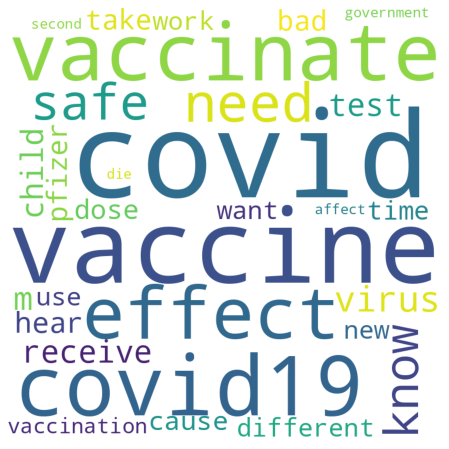

In [ ]:
#for dataset 1 - sentence_lemma
all_text = ''.join(df1_intent_expression['sentence_lemma'].astype(str))
generate_wordcloud(all_text)


Printing top 10 values...


,Word,Count
0,get,334
1,covid19,292
2,vaccineneed,173
3,test,172
4,m,168
5,vaccinetrust,159
6,reaction,158
7,safety,154
8,measure,154
9,bad,152


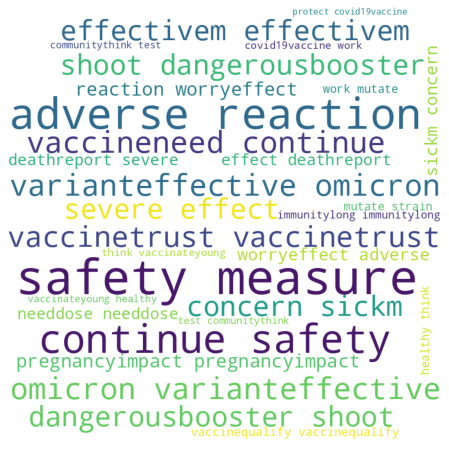

In [ ]:
# for dataset 1 - label_lemma
all_text = ''.join(df1_intent_expression['label_lemma'].astype(str))
generate_wordcloud(all_text)

Printing top 10 values...


,Word,Count
0,covid,128
1,vaccine,80
2,get,66
3,vaccinate,51
4,booster,44
5,term,43
6,covid19,39
7,pfizer,39
8,effect,30
9,need,30


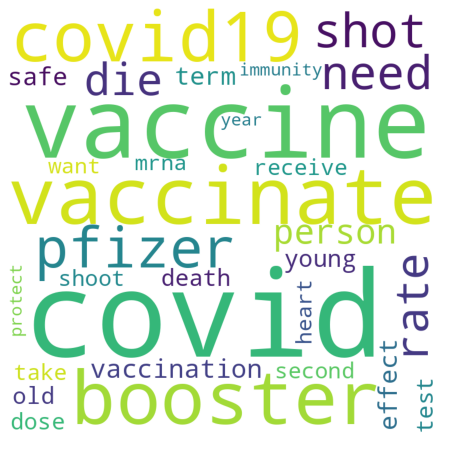

In [ ]:
# for dataset 2
all_text = ''.join(df2_trust['text_lemma'].astype(str))
generate_wordcloud(all_text)

### top 20 most frequent word visualization from dataset 1

In [ ]:
# Define a function to generate word frequency counts
def get_word_freq(df, column_name):
    words = []
    for sentence in df[column_name]:
        words += sentence.split()
    return Counter(words)

# Get the word frequency counts for the sentence_lemma column
sentence_lemma_word_freq = get_word_freq(df1_intent_expression, 'sentence_lemma')
# Get the top 20 words
sentence_lemma_top_20_words = sentence_lemma_word_freq.most_common(20)

# Get the word frequency counts for the label_lemma column
label_lemma_word_freq = get_word_freq(df1_intent_expression, 'label_lemma')
# Get the top 20 words
label_lemma_top_20_words = label_lemma_word_freq.most_common(20)

# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 20 words in sentence_lemma column", "Top 20 words in label_lemma column"))

# Add a bar chart for the sentence_lemma column to the first column of the subplot
fig.add_trace(go.Bar(x=[x[0] for x in sentence_lemma_top_20_words], y=[x[1] for x in sentence_lemma_top_20_words], name='sentence_lemma'), row=1, col=1)

# Add a bar chart for the label_lemma column to the second column of the subplot
fig.add_trace(go.Bar(x=[x[0] for x in label_lemma_top_20_words], y=[x[1] for x in label_lemma_top_20_words], name='label_lemma'), row=1, col=2)

# Set the title of the subplot
fig.update_layout(title_text="Top 20 words in df_intent_expression")

# Show the plot
fig.show()


### top 20 most frequent word visualization from dataset 2

In [ ]:
# Define a function to generate word frequency counts
def get_word_freq(df, column_name):
    words = []
    for sentence in df[column_name]:
        words += sentence.split()
    return Counter(words)

# Get the word frequency counts for the text_lemma column in dataset 2
text_lemma_word_freq = get_word_freq(df2_trust, 'text_lemma')
# Get the top 20 words
text_lemma_top_20_words = text_lemma_word_freq.most_common(20)

# Create a bar chart of the top 20 words in the text_lemma column
fig = go.Figure([go.Bar(x=[x[0] for x in text_lemma_top_20_words], y=[x[1] for x in text_lemma_top_20_words], name='text_lemma')])
# Set the title of the subplot
fig.update_layout(title_text="Top 20 words in df2_trust")

# Show the plot
fig.show()

## Describing Bigram, trigram models, as a part of collocation analysis

<p align = "justify">Collocation analysis plays a critical role in text analysis as it uncovers common phrases and words that co-occur frequently. By identifying the most frequent bigrams, trigrams, or n-grams in the corpus, it provides insights into the underlying patterns of language usage. Instead of merely relying on the frequency of collocation occurrence, it is more effective to utilize log-likelihood values to identify the most significant collocations. This approach enables us to pinpoint significant collocations that may otherwise go unnoticed using frequency counts alone, allowing for a more detailed and accurate understanding of the language patterns. Therefore, collocation analysis is a fundamental component of any text analysis project and a powerful tool in extracting meaningful insights from textual data.</p>

<p align = "justify">For the dataset 1 intent expressions, the top 10 bigrams and trigrams have been extracted using log-likelihood value. The bigrams for the sentence column suggest that the users are concerned about safety, effectiveness, and basic human rights in relation to the COVID-19 vaccine. The trigrams for the sentence column show that the users are concerned about the safety, effectiveness, and promotion of good health practices. Comparing with the most frequent words result, the emergence of basic human rights from the input is a new finding</p>

<p align = "justify">On the other hand, the bigrams for the label column suggest that users are concerned about the need for change in practices related to COVID-19 and the importance of social distancing and mask-wearing, while the trigrams for the label column emphasize the importance of social distancing, mask-wearing, and individual responsibility in mitigating the spread of COVID-19. This analysis provides a completely different angle than the previous frequent word analysis.</p>

<p align = "justify">Similarly, for dataset 2, the bigrams and trigrams for the text column suggest that users are concerned about the progression of COVID-19 and the effectiveness of the vaccine. The bigrams and trigrams also highlight the importance of waiting, concern, and triggers related to the vaccine.</p>

<p align = "justify">In NLP, the most frequent one is not always the most important one. The word cloud and most frequent words analysis provide a general idea of the vocabulary used in the corpus, whereas collocation analysis helps in understanding the significant phrases or words that are commonly used. The insights obtained from these analyses can be useful in understanding the users' concerns and expectations related to COVID-19 and the vaccine.</p>

### bigram model - part of collocation analysis
<p align = "justify"></p>

<p align = "justify"></p>

<p align = "justify"></p>

<p align = "justify"></p>

<p align = "justify"></p>

In [ ]:
def get_top_bigrams(text, n=10):
    # Split the lemmatized sentences into individual words
    words = text.split()

    # Create a BigramCollocationFinder object
    bigram_finder = BigramCollocationFinder.from_words(words)

    # Use the PMI association measure to score bigrams
    bigram_measures = BigramAssocMeasures()
    scored_bigrams = bigram_finder.score_ngrams(bigram_measures.pmi)

    # Sort the bigrams by score in descending order
    sorted_bigrams = sorted(scored_bigrams, key=lambda x: x[1], reverse=True)

    # Return the top n bigrams as a DataFrame
    top_bigrams = pd.DataFrame(sorted_bigrams[:n], columns=['bigram', 'score'])
    return top_bigrams


In [ ]:
# for dataset 1 - sentence lemma
top_bigrams = df1_intent_expression['sentence_lemma'].apply(get_top_bigrams)
all_bigrams = pd.concat(top_bigrams.tolist(), ignore_index=True)
all_bigrams.drop_duplicates(inplace=True)
all_bigrams.sort_values(by = 'score', ascending = False).head(10)

,bigram,score
4932,"(cause, misguided)",4.807355
4935,"(consider, basic)",4.807355
4940,"(life, promote)",4.807355
4939,"(intervention, world)",4.807355
4938,"(human, right)",4.807355
4937,"(effective, public)",4.807355
4936,"(country, think)",4.807355
4931,"(basic, human)",4.807355
4933,"(clean, water)",4.807355
4934,"(concern, safety)",4.807355


In [ ]:
# for dataset 1 - label lemma
top_bigrams = df1_intent_expression['label_lemma'].apply(get_top_bigrams)
all_bigrams = pd.concat(top_bigrams.tolist(), ignore_index=True)
all_bigrams.drop_duplicates(inplace=True)
all_bigrams.sort_values(by = 'score', ascending = False).head(10)

,bigram,score
176,"(practice, depend)",3.169925
172,"(depend, covid19)",3.169925
170,"(change, mask)",3.169925
171,"(covid19, get)",3.169925
177,"(social, distancing)",3.169925
173,"(distancing, practice)",3.169925
175,"(need, change)",3.169925
174,"(mask, social)",3.169925
666,"(wear, mask)",3.000000
665,"(need, wear)",3.000000


In [ ]:
# for dataset 2 - text lemma
top_bigrams = df2_trust['text_lemma'].apply(get_top_bigrams)
all_bigrams = pd.concat(top_bigrams.tolist(), ignore_index=True)
all_bigrams.drop_duplicates(inplace=True)
all_bigrams.sort_values(by = 'score', ascending = False).head(10)

,bigram,score
3364,"(continue, wait)",3.906891
3363,"(concern, covid)",3.906891
3366,"(disease, year)",3.906891
3367,"(halt, progression)",3.906891
3368,"(m, concern)",3.906891
3369,"(progression, disease)",3.906891
3370,"(relapse, continue)",3.906891
3371,"(sclerosis, undergo)",3.906891
3372,"(trigger, relapse)",3.906891
3365,"(covid, vaccine)",3.906891


### trigram model - part of collocation analysis

In [ ]:
def get_top_trigrams(text, n=10):
    # Split the lemmatized sentences into individual words
    words = text.split()

    # Create a TrigramCollocationFinder object
    trigram_finder = TrigramCollocationFinder.from_words(words)

    # Use the PMI association measure to score Trigrams
    trigram_measures = TrigramAssocMeasures()
    trigram_scores = trigram_finder.score_ngrams(trigram_measures.pmi)

    # Sort the Trigrams by score in descending order
    sorted_trigrams = sorted(trigram_scores, key=lambda x: x[1], reverse=True)

    # Return the top n bigrams as a DataFrame
    top_trigrams = pd.DataFrame(sorted_trigrams[:n], columns=['trigram', 'score'])
    return top_trigrams

In [ ]:
# for dataset 1 - sentence lemma
top_trigrams = df1_intent_expression['sentence_lemma'].apply(get_top_trigrams)
all_trigrams = pd.concat(top_trigrams.tolist(), ignore_index=True)
all_trigrams.drop_duplicates(inplace=True)
all_trigrams.sort_values(by = 'score', ascending = False).head(10)

,trigram,score
3312,"(consider, basic, human)",9.61471
3318,"(perform, well, uptake)",9.61471
3316,"(life, promote, good)",9.61471
3315,"(intervention, world, save)",9.61471
3314,"(human, right, perform)",9.61471
3313,"(country, think, cause)",9.61471
3311,"(clean, water, consider)",9.61471
3310,"(cause, misguided, concern)",9.61471
3309,"(basic, human, right)",9.61471
3317,"(misguided, concern, safety)",9.61471


In [ ]:
# for dataset 1 - label lemma
top_trigrams = df1_intent_expression['label_lemma'].apply(get_top_trigrams)
all_trigrams = pd.concat(top_trigrams.tolist(), ignore_index=True)
all_trigrams.drop_duplicates(inplace=True)
all_trigrams.sort_values(by = 'score', ascending = False).head(10)

,trigram,score
98,"(social, distancing, practice)",6.33985
92,"(change, mask, social)",6.33985
93,"(depend, covid19, get)",6.33985
94,"(distancing, practice, depend)",6.33985
95,"(mask, social, distancing)",6.33985
96,"(need, change, mask)",6.33985
97,"(practice, depend, covid19)",6.33985
362,"(individual, need, wear)",6.00000
363,"(live, immunocompromise, individual)",6.00000
364,"(mask, m, vaccinate)",6.00000


In [ ]:
# for dataset 2 - text lemma
top_trigrams = df2_trust['text_lemma'].apply(get_top_trigrams)
all_trigrams = pd.concat(top_trigrams.tolist(), ignore_index=True)
all_trigrams.drop_duplicates(inplace=True)
all_trigrams.sort_values(by = 'score', ascending = False).head(10)

,trigram,score
1952,"(sclerosis, undergo, halt)",7.813781
1948,"(halt, progression, disease)",7.813781
1951,"(relapse, continue, wait)",7.813781
1953,"(trigger, relapse, continue)",7.813781
1949,"(m, concern, covid)",7.813781
1950,"(progression, disease, year)",7.813781
1947,"(disease, year, m)",7.813781
1946,"(covid, vaccine, trigger)",7.813781
1945,"(continue, wait, datum)",7.813781
1944,"(concern, covid, vaccine)",7.813781


## Describing Topic Modelling

<p align = "justify">Topic modeling is a powerful technique in natural language processing that helps to identify patterns in large sets of unstructured text data. It is a method for uncovering latent topics within a collection of documents by automatically clustering words that frequently co-occur together. One popular library for implementing topic modeling is Gensim, which is widely used for its efficiency and flexibility</p>

<p align = "justify">The Gensim topic modeling output for the three datasets provides insights into the most common topics that users are discussing related to vaccination and COVID-19. The output is presented in the form of a matrix, where each row represents a specific topic, and the columns display the top 10 most relevant words for that topic, along with their corresponding probabilities. The probabilities represent the likelihood of each word being associated with the given topic.</p>

<p align = "justify">For the label  column of df1_intent_expression dataset, the top ten topics for the column are as follows:</p>


*   Topic 1: Vaccine and COVID Protection - This topic is focused on the need for vaccines and their effectiveness in protecting against COVID-19.
*   Topic 2: Vaccine Side Effects - This topic is focused on the long-term effects of vaccines and the wait times for immunity.
*   Topic 3: Vaccine Boosters - This topic is focused on the differences between vaccine boosters and regular vaccines, and the safety of booster shots.
<br>

<p align = "justify">For the label  column of df1_intent_expression dataset, the top ten topics for the column are as follows:</p>

*   Topic 1: COVID and Vaccine Protection Efficiency - This topic is focused on the effectiveness of vaccines in protecting against COVID-19.
*   Topic 2: Vaccine Side Effects and Safety - This topic is focused on the safety and side effects of vaccines.
*   Topic 3: Vaccine Trust and Need - This topic is focused on the need for vaccines and building trust in their safety and effectiveness.

<br>
<p align = "justify">For the text  column of df1_intent_expression dataset, the top ten topics for the column are as follows:</p>

*   Topic 1: Vaccine Effectiveness - This topic is focused on the effectiveness of vaccines in preventing COVID-19.
*   Topic 2: Vaccine Safety and Effectiveness for Children - This topic is focused on the safety and effectiveness of vaccines for children.
*   Topic 3: Vaccine Immunity - This topic is focused on the long-term immunity provided by vaccines and their effectiveness in preventing the spread of COVID-19.

<br><br>
<p align = "justify">To further explore the topics and their relationships, interactive visualizations are available for each topic modeling output. The visualization is based on two types of information: the inter-topic distance map and the topic-term relevance matrix. The inter-topic distance map is a scatterplot that shows the similarity between different topics. The topic-term relevance matrix is a heatmap that shows the relevance of each term in each topic.</p>
<p align ="justify">In the scatterplot, each dot represents a topic, and the closer two dots are, the more similar their topics are. By hovering over each dot to see the top keywords that define the topic, as well as its prevalence and overall frequency.</P>
<p align = "justify">In the heatmap, the rows represent topics and the columns represent terms. The color of each cell represents the importance of the term for the topic. You can hover over each cell to see the probability of the term in the given topic and the frequency of the term across the entire corpus.</p>

<p align = "justify">The relevance parameter (lambda) is used to control the importance of the individual terms in the topic-term matrix when visualizing the topics. It is a slider that ranges from 0 to 1 and affects the weighting of the terms in each topic. This can be helpful in identifying the most significant terms in each topic and can help in interpreting the meaning of each topic.</p>

### topic modelling

In [ ]:
nltk.download('punkt')
def show_topic(df, column_name, num_topics):
    # Tokenize a document into words
    texts = [[word for word in word_tokenize(document)] for document in df]

    # Create a dictionary from the preprocessed texts
    dictionary = corpora.Dictionary(texts)

    # Create a bag-of-words representation of the texts
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Perform LDA topic modeling on the corpus
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics,
                                                passes=10,
                                                random_state=329)

    # Print the topics and their associated words
    print(lda_model.print_topics())

    # Visualize the LDA model using pyLDAvis
    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    
    # Save the visualization as an HTML file
    file_name = 'lda_{}.html'.format(column_name)
    file_path = os.path.join(os.getcwd(), file_name)
    pyLDAvis.save_html(vis, file_path)

    # Open the HTML file in a new browser tab
    from google.colab import output
    output.eval_js('window.open("{}");'.format(file_path))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# for dataset-1 - sentence lemma
show_topic(df1_intent_expression['sentence_lemma'], 'sentence_lemma', 10)
IPython.display.HTML(filename=os.path.join(os.getcwd(), file_name))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

[(0, '0.084*"vaccine" + 0.068*"ve" + 0.063*"hear" + 0.062*"covid19" + 0.040*"covid" + 0.034*"different" + 0.031*"time" + 0.024*"vaccination" + 0.020*"contain" + 0.018*"symptom"'), (1, '0.201*"effect" + 0.051*"long" + 0.040*"vaccine" + 0.037*"bad" + 0.033*"wait" + 0.028*"term" + 0.024*"reaction" + 0.022*"worry" + 0.020*"know" + 0.018*"report"'), (2, '0.099*"test" + 0.064*"think" + 0.044*"sick" + 0.041*"affect" + 0.028*"covid19" + 0.027*"die" + 0.023*"safe" + 0.020*"baby" + 0.018*"condition" + 0.018*"know"'), (3, '0.084*"child" + 0.070*"m" + 0.066*"pfizer" + 0.064*"vaccine" + 0.032*"safe" + 0.030*"young" + 0.025*"worried" + 0.022*"disease" + 0.021*"school" + 0.021*"case"'), (4, '0.199*"vaccine" + 0.107*"covid" + 0.072*"need" + 0.064*"dose" + 0.053*"know" + 0.039*"protect" + 0.033*"receive" + 0.033*"get" + 0.020*"problem" + 0.019*"positive"'), (5, '0.048*"mask" + 0.047*"vaccine" + 0.036*"vaccinate" + 0.033*"wear" + 0.032*"find" + 0.028*"good" + 0.023*"shoot" + 0.023*"way" + 0.021*"necessa

In [ ]:
# for dataset-1 - label lemma
show_topic(df1_intent_expression['label_lemma'], 'label_lemma', 10)
IPython.display.HTML(filename=os.path.join(os.getcwd(), file_name))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

[(0, '0.206*"vaccinate" + 0.093*"m" + 0.054*"virus" + 0.042*"pay" + 0.041*"indoor" + 0.040*"concerned" + 0.039*"effective" + 0.033*"approve" + 0.033*"immunocompromise" + 0.032*"safe"'), (1, '0.092*"m" + 0.076*"long" + 0.061*"immunity" + 0.060*"concern" + 0.060*"wait" + 0.045*"get" + 0.038*"mask" + 0.038*"wear" + 0.036*"safety" + 0.035*"research"'), (2, '0.184*"variant" + 0.133*"dangerous" + 0.105*"effective" + 0.075*"shoot" + 0.062*"omicron" + 0.060*"tell" + 0.059*"booster" + 0.054*"mandatory" + 0.047*"different" + 0.035*"distrust"'), (3, '0.179*"test" + 0.110*"think" + 0.094*"vaccinate" + 0.077*"positive" + 0.057*"manipulate" + 0.049*"getting" + 0.047*"animal" + 0.041*"healthy" + 0.041*"community" + 0.031*"magnetic"'), (4, '0.216*"covid19" + 0.145*"vaccine" + 0.091*"protect" + 0.052*"ve" + 0.052*"need" + 0.042*"treat" + 0.033*"vaccination" + 0.032*"qualify" + 0.026*"chatbot" + 0.026*"take"'), (5, '0.143*"shot" + 0.128*"booster" + 0.093*"vaccine" + 0.064*"effect" + 0.053*"difference" +

In [ ]:
# for dataset-2 - text lemma
show_topic(df2_trust['text_lemma'], 'text_lemma', 10)
IPython.display.HTML(filename=os.path.join(os.getcwd(), file_name))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

[(0, '0.151*"covid" + 0.053*"vaccination" + 0.040*"test" + 0.039*"dose" + 0.034*"available" + 0.030*"good" + 0.026*"death" + 0.023*"positive" + 0.021*"symptom" + 0.020*"rate"'), (1, '0.120*"safe" + 0.045*"mask" + 0.031*"trial" + 0.028*"wear" + 0.026*"blood" + 0.019*"clot" + 0.019*"kill" + 0.016*"question" + 0.014*"pfizer" + 0.014*"testing"'), (2, '0.341*"vaccine" + 0.050*"person" + 0.047*"covid" + 0.029*"work" + 0.017*"reaction" + 0.015*"different" + 0.015*"prevent" + 0.013*"adverse" + 0.012*"mrna" + 0.011*"receive"'), (3, '0.041*"antibodie" + 0.028*"help" + 0.024*"study" + 0.018*"year" + 0.015*"mean" + 0.015*"feel" + 0.012*"people" + 0.012*"safety" + 0.011*"g" + 0.011*"receive"'), (4, '0.129*"booster" + 0.100*"need" + 0.067*"shot" + 0.048*"covid" + 0.036*"shoot" + 0.035*"pfizer" + 0.027*"get" + 0.024*"moderna" + 0.017*"dose" + 0.017*"know"'), (5, '0.258*"vaccinate" + 0.042*"effect" + 0.039*"approve" + 0.033*"child" + 0.022*"young" + 0.018*"kid" + 0.015*"sick" + 0.013*"rate" + 0.012*"r

## Describing Sentiment Analysis
<p align = "justify">Sentiment analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text as either positive, negative or neutral. It is an important tool in data analysis as it helps to extract valuable insights from vast amounts of textual data.</p>

<p align = "justify">In the datasets provided for this tasks, sentiment analysis can be used to gain an understanding of how people feel about vaccines and COVID-19. By analyzing the sentiment of the text data, it can be analyzed how people are feeling about the vaccines and with that pattern important decison-making regarding healthcare policy, public health campaigns, and risk communication can take place.</p>

<p align = "justify">The interactive visualizations of sentiment analysis provide an intuitive and user-friendly interface that enables users to easily explore and interpret the sentiment of the text data. They provide a clear representation of the distribution of sentiment across the datasets, allowing for a quick and easy comparison of the number of positive, negative, and neutral sentiments.</p>

<p align = "justify">In this analysis, in terms of intent or trust, most of the people are neutral and then positive. Only a handful amount of people are negative in both the cases.</p>


### sentiment analysis

In [ ]:
# define function to get sentiment analysis and visualize it.
def get_sentiment(sentence):
    blob = TextBlob(sentence)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

def plot_sentiment_analysis(df, column_name):
    df['sentiment'] = df[column_name].apply(get_sentiment)
    sentiment_counts = df['sentiment'].value_counts().reset_index()
    sentiment_counts.columns = ['sentiment', 'count']
    
    # Specify the color of the bars based on sentiment
    color_discrete_map = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}
    
    fig = px.bar(sentiment_counts, x='sentiment', y='count',
                 color='sentiment', color_discrete_map=color_discrete_map)
    
    # Add a legend to the plot
    fig.update_layout(title='Sentiment Analysis of {}'.format(column_name),
                      legend_title='Sentiment')
    fig.show()


In [ ]:
# for dataset 1 - sentence lemma
plot_sentiment_analysis(df1_intent_expression, "sentence_lemma")

# for dataset 1 - label lemma
plot_sentiment_analysis(df1_intent_expression, "label_lemma")

In [ ]:
# for dataset 2 - text lemma
plot_sentiment_analysis(df2_trust, "text_lemma")

## Describing Concordance
<p align = "justify">Concordance analysis is a powerful tool in natural language processing that enables to examine the context of a word or phrase within a larger body of text. It is important as it provides insights into the usage and frequency of specific words and their associated meanings. In the given datasets, concordance analysis can be useful in determining the frequency of certain terms and how they are used within the context of the data.</p>

<p align = "justify">In the df1_intent_expression-sentence column, the concordance analysis reveals that terms such as "vaccine," "covid," and "reaction" are frequently used. Additionally, the concordance analysis in the df1_intent_expression-label column reveals that the focus is on safety measures and the potential adverse effects of the vaccine. In the df2_trust-text column, the concordance analysis reveals concerns about the safety and efficacy of vaccines, specifically the long-term effects and the use of fetal tissue in the development of vaccines.</p>

<p align = "justify">In every case here, the associations with vaccine have been identified. However, this analysis can be taken ahead and look deeper into other frequent words and their outcome. That might unveil some more information which cannot be accessed with other operations discussed here. In other words, Concordance analysis is like a magnifying glass that allows us to zoom in on the specific words and phrases. It is helpful to extract meaning from large unstructured data.</p>


## concordance analysis

In [ ]:
def display_concordance(df, column_name, word):
    # Tokenize the text in the specified column
    token_lists = [nltk.word_tokenize(sentence.lower()) for sentence in df[column_name]]

    # Flatten the list of token lists into a single list
    tokens = [token for token_list in token_lists for token in token_list]

    # Create a ConcordanceIndex object from the tokens
    concordance_index = nltk.text.ConcordanceIndex(tokens)

    # Print the concordance lines for the specified word
    concordance_index.print_concordance(word)


In [ ]:
display_concordance(df1_intent_expression, 'sentence_lemma', 'vaccine')

Displaying 25 of 1895 matches:
on prove community assumption avoid vaccine true cause strong complication woma
lication woman effect harmful woman vaccine bad effect woman undiscovered effec
ain inflammation brain inflammation vaccine true covid19 vaccine brain inflamma
n inflammation vaccine true covid19 vaccine brain inflammation m bit worried ca
m bit worried catch coronavirus get vaccine contain virus end get covid body ab
id body able fight live covid virus vaccine possible sick covid different time 
ntage covid need tell swollen lymph vaccine swollen lymph vaccine sclerosis vac
swollen lymph vaccine swollen lymph vaccine sclerosis vaccine sclerosis safe se
ine swollen lymph vaccine sclerosis vaccine sclerosis safe send anaphylactic sh
b able allergy ad allergic reaction vaccine safe vaccine ve allergic reaction v
y ad allergic reaction vaccine safe vaccine ve allergic reaction vaccine safe g
e safe vaccine ve allergic reaction vaccine safe get covid vaccine time vaccina
gic react

In [ ]:
display_concordance(df1_intent_expression, 'label_lemma', 'vaccine')

Displaying 25 of 2354 matches:
regular safety measure stay healthy vaccine safe young child vaccine safe young
ay healthy vaccine safe young child vaccine safe young child effect bad second 
econd shot medical contraindication vaccine medical contraindication vaccine wo
on vaccine medical contraindication vaccine woman bad effect man woman bad effe
fect man woman bad effect man covid vaccine bad disease covid vaccine bad disea
man covid vaccine bad disease covid vaccine bad disease covid vaccine bad disea
ase covid vaccine bad disease covid vaccine bad disease covid vaccine bad disea
ase covid vaccine bad disease covid vaccine bad disease covid vaccine bad disea
ase covid vaccine bad disease covid vaccine bad disease covid19 dangerous covid
covid19 dangerous covid19 dangerous vaccine vaccine brain inflammation brain in
dangerous covid19 dangerous vaccine vaccine brain inflammation brain inflammati
ain inflammation brain inflammation vaccine vaccine vaccine covid19 covid19 cov
ammation 

In [ ]:
display_concordance(df2_trust, 'text_lemma', 'vaccine')

Displaying 25 of 509 matches:
 vaccine cause heart condition young child l
 urine vqccine melt organ kill take vaccine heart attack long time effect covid
rtion rate pregnant woman take mrna vaccine adverse reaction rate die covid vac
t kid certain effectiveness covid19 vaccine receive experimental product vaccin
th far failure reaction shoot covid vaccine vaccination blood clot vaccine safe
ovid vaccine vaccination blood clot vaccine safe approve die vaccine get covid 
blood clot vaccine safe approve die vaccine get covid get ask person try kill t
n try kill transplant patient think vaccine vaccine die covid19 vaccine heart p
ll transplant patient think vaccine vaccine die covid19 vaccine heart problem v
t think vaccine vaccine die covid19 vaccine heart problem vacccine trust vaccin
accine heart problem vacccine trust vaccine vaccine chip track short term effec
eart problem vacccine trust vaccine vaccine chip track short term effect vaccin
accine chip track short term effect vaccine m

## Describing most concerned topics and most asked question from the raw data

<p align = "justify"> This section aimed to extract information from the raw data without any preprocessing or sophisticated modeling. Based on the most prominent topics, it is evident that people are primarily concerned about the efficacy and safety of the COVID-19 vaccine. Most of the outcomes in the form of questions, indicates a curious mindset. Providing the necessary information can foster a positive inclination towards the vaccination process.</p>
<p align = "justify">The top 10 most frequently asked questions within the dataset predominantly revolve around concerns pertaining to the potential consequences of receiving the COVID-19 vaccine, including queries regarding its safety and potential negative effects on one's health. These findings may suggest a gap in communication between the general public and those responsible for administering the vaccine. Such insights can be leveraged to address and alleviate these concerns through targeted communication and education initiatives </p>

### most prominent topics

In [ ]:
label_counts = Counter(df1['label'])
display(pd.DataFrame(label_counts.most_common(10), columns = ['label', 'count']))

,label,count
0,How effective is the vaccine against the Omicr...,101
1,How much will I have to pay for the vaccine,101
2,Do I need to continue safety measures after ge...,100
3,I don't trust vaccines if they're from China o...,100
4,What is the Omicron variant?,100
5,The COVID vaccine is not safe,99
6,Can I still get COVID even after being vaccina...,97
7,How many doses do I need?,93
8,I'm not sure it is effective enough,91
9,Is the booster shot dangerous?,90


### most asked question

In [ ]:
label_counts = Counter(df1['sentence'])
display(pd.DataFrame(label_counts.most_common(10), columns = ['question', 'count']))

,question,count
0,How long am I immune?,2
1,"If I apply the third dose, will I have stronge...",1
2,What effects do these reinforcements have?,1
3,i dont think the vaccine is neccessary the bas...,1
4,"If I comply with the security measures, will I...",1
5,"This is like the flu, being cautious is enough.",1
6,"Wearing a mask, washing your hands and taking ...",1
7,If you practice safe measures you will stay he...,1
8,Would the vaccine hurt a lot to a child?,1
9,its effectiveness in younger children is not p...,1


## Describing Raw Trust Level from dataset 2

<p align = "justify">There are four different level of trust when it comes to covid -19 vaccines.

</p>


1.   <p align = "justify">Low institutional trust: refers to a lack of trust in government and other institutions involved in the distribution and administration of the COVID-19 vaccine.</p>
2.   <p align = "justify">Low agent trust: refers to a lack of trust in healthcare providers and other individuals involved in the vaccine distribution process.</p>
3.   <p align = "justify">Neutral: implies a lack of strong positive or negative sentiment towards the vaccine or those involved in its distribution.</p>
4.   <p align = "justify">High trust: indicates a strong level of trust in the vaccine and those responsible for its distribution and administration.</p>

<p align = "justify">The graphical representation of the dataset shows that a majority of the sample population displays low levels of institutional and agent trust. This mainly pertains to individuals who are associated with the government and healthcare sectors. This finding, although not entirely consistent with the earlier sentiment analysis, aligns with the prevailing question regarding the inability of people to fully trust these entities. A possible reason for this lack of trust may stem from inadequate communication efforts on the part of these organizations. If the benefits of vaccination are effectively communicated, it is likely that the proportion of individuals with low trust levels would decrease.</p>


### Trust Level - from second dataset

In [ ]:
# Define color palette
colors = ['#8B0000', '#FF7F50', '#FFFFE0', '#00FA9A']

# Create a dataframe with the label counts
label_counts = df2['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
label_counts['label'] = ['0 - Low Institutional Trust', '1 - Low Agent Trust', '2 - Neutral', '3 - High Trust']

# Plot the bar chart
fig = px.bar(label_counts, x='label', y='count', color='label', color_discrete_sequence=colors, 
             labels={'label': 'Label', 'count': 'Count'}, title='Distribution of Trust Levels in Covid-19 Vaccines')

# Customize the layout
fig.update_layout(title={'font': {'size': 16}, 'x': 0.5, 'y': 0.9},
                  xaxis={'title': {'font': {'size': 14}, 'text': 'Label'}, 
                         'tickfont': {'size': 12}, 'tickangle': 0, 'showgrid': False},
                  yaxis={'title': {'font': {'size': 14}, 'text': 'Count'}, 
                         'tickfont': {'size': 12}, 'showgrid': False},
                  legend={'title': {'text': 'Markers'}, 'font': {'size': 12}, 'orientation': 'v', 'x': 0.913, 'y': 0.996},
                  margin={'l': 50, 'r': 50, 't': 100, 'b': 50})

# Show the plot
fig.show()

# Evaluation and Deployment

Being an analysis task, the evaluation and deployment parts have been omitted.

# Conclusion

<p align = "justify">In conclusion, the analysis of the provided datasets using natural language processing techniques has provided valuable insights into public perception and attitudes towards the COVID-19 vaccine. The initial exploratory analysis of the data revealed a considerable amount of noise and missing values, which were handled using various preprocessing techniques such as data cleaning and imputation.</p>

<p align = "justify">Topic modeling was used to identify the most prevalent themes in the data, with the results showing that the majority of discussions revolved around vaccine safety, effectiveness, and side effects. Sentiment analysis was used to determine the overall attitudes towards the vaccine, with the results showing that the majority of the sentiment was neutral.</p>

<p align = "justify">Concordance analysis provided insights into the frequency and context of certain terms used in the data, indicating a communication gap between the mass public and those responsible for providing the vaccine. This information can be used to improve communication strategies and mitigate issues related to vaccine hesitancy.</p>

<p align = "justify">Furthermore, the raw data analysis conducted in this project provided valuable insights into the language usage and sentiment of the texts in the given datasets.</p>

<p align = "justify">Overall, this analysis provides a foundation for understanding public perception towards the COVID-19 vaccine and can be useful for public health officials and policymakers in developing effective communication strategies to increase vaccine uptake and address vaccine hesitancy.</p>